In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Salary_data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

### Extracting input columns( Features ) and output columns( Target )

In [19]:
X=data.iloc[:,0:1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [20]:
y=data.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Cross Validation/ TrainTestSplit

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape

(24, 1)

In [27]:
y_train.shape

(24,)

In [28]:
X_test.shape

(6, 1)

In [29]:
y_test.shape

(6,)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor=LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
X_test

array([[10.5],
       [ 5.1],
       [ 4.5],
       [ 6. ],
       [ 2.9],
       [ 3.2]])

In [44]:
regressor.predict(np.array(100).reshape(1,1))

array([973868.19247618])

In [47]:
def salary_predictor(experience):
    return regressor.predict(np.array(experience).reshape(1,1))[0]
salary_predictor(500)

4765981.113882056

In [48]:
exp=data['YearsExperience'].values

In [49]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

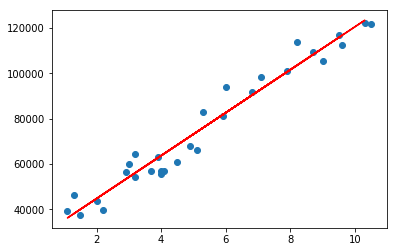

In [53]:
plt.scatter(exp,y)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [60]:
m=regressor.coef_[0]

In [62]:
c=regressor.intercept_

In [64]:
m*500 + c

4765981.113882056

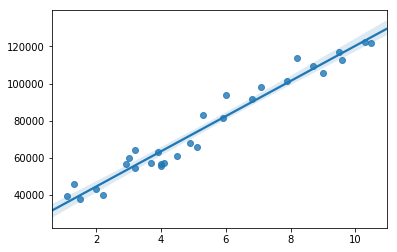

In [55]:
sns.regplot(exp,y)

## r2_score : Measurement of Goodness of Fit

In [65]:
from sklearn.metrics import r2_score

In [66]:
y_pred=regressor.predict(X_test)
y_pred

array([125382.92631161,  74189.40187263,  68501.23249052,  82721.65594579,
        53332.7808049 ,  56176.86549595])

In [67]:
y_test

array([121872.,  66029.,  61111.,  93940.,  56642.,  54445.])

In [69]:
r2_score(y_test,y_pred)

0.9237747553115258

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


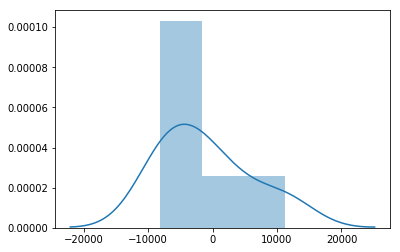

In [70]:
sns.distplot(y_test-y_pred)